In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
import math
#from statsmodels.distributions.empirical_distribution import ECDF
from functools import reduce
from random import sample
# import dill
import os
%matplotlib inline
sns.set(style="ticks")

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


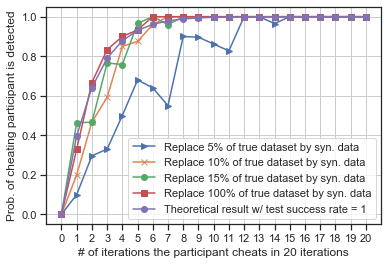

lied_5pc=  [0, 0.1, 0.296296296, 0.33, 0.5, 0.68, 0.64, 0.55, 0.9, 0.896, 0.862, 0.827, 1, 1, 0.965, 1, 1, 1, 1, 1, 1]
lied_10pc=  [0, 0.2, 0.467, 0.592, 0.85, 0.875, 0.9602, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
lied_15pc=  [0, 0.464, 0.466, 0.766, 0.758, 0.966, 1, 0.96, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
lied_100pc=  [0, 0.33, 0.667, 0.833, 0.9, 0.933, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
# dataset: 500K
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10


p1s = [0.5]

p2s_1 =[]


total_round1 = num_query1 + num_test1


num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   



mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]



## 3 cases
pCA_sim_lied_100pc_30runs = [0,0.33,0.667,0.833,0.9,0.933,1,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

pCA_sim_lied_50pc_30runs =[0, 0.367,0.542857143,0.767,0.842222222,0.9402,0.9602,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

pCA_sim_lied_10pc_30runs =[0, 0.2,0.467,0.592,0.85,0.875,0.9602,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## new results
pCA_sim_lied_05pc_30runs = [0, 0.1,0.296296296,0.33,0.5,0.68,0.64,0.55,0.9,0.896,0.862,0.827,1,1,0.965,1,1,1,1,1,1]

pCA_sim_lied_15pc_30runs =[0, 0.464,0.466,0.766,0.758,0.966,1,0.96,1,1,1,1,1,1,1,1,1,1,1,1,1]


## imperical result
pCA_sim_scale_1 = [0, 0.15,0.45,0.6,0.65,0.8,0.85,0.8,0.8,0.95,0.9, 1, 1, 1, 1,1,1,1,1,1,1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])

# plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1,  pCA_sim_lied_100pc_30runs, '->', num_lies_s1, pCA_sim_lied_80pc_30runs, '-v',
#          num_lies_s1, pCA_sim_lied_50pc_30runs, '-x', num_lies_s1, pCA_sim_lied_30pc_30runs, '-*',
#         num_lies_s1, pCA_sim_lied_10pc_30runs, '-s', num_lies_s1, pCA_sim_scale_1, '-<')

plt.plot( num_lies_s1,  pCA_sim_lied_05pc_30runs, '->', 
         num_lies_s1, pCA_sim_lied_10pc_30runs, '-x',
         num_lies_s1, pCA_sim_lied_15pc_30runs, '-o',
        num_lies_s1, pCA_sim_lied_100pc_30runs, '-s',
        num_lies_s1, pCA3, '-o')

plt.legend(['Replace 5% of true dataset by syn. data', 
             'Replace 10% of true dataset by syn. data',
            'Replace 15% of true dataset by syn. data', 
             'Replace 100% of true dataset by syn. data',
           'Theoretical result w/ test success rate = 1'])

plt.xlabel('# of iterations the participant cheats in 20 iterations')
plt.ylabel('Prob. of cheating participant is detected')
plt.savefig('Prob_lied_detected_10_num_query_10_tests_30runs_500K_replacing_05_10_10_100pc.pdf', dpi=300, bbox_inches='tight')
plt.show()
# print(pCA1)

print('lied_5pc= ',pCA_sim_lied_05pc_30runs)
print('lied_10pc= ', pCA_sim_lied_10pc_30runs)
print('lied_15pc= ',pCA_sim_lied_15pc_30runs)
print('lied_100pc= ', pCA_sim_lied_100pc_30runs)

In [13]:
m = 1000000007
x = 1234567
y = pow(x,m-2,m)
y
# 989145189L
z1=x*y
# 1221166008548163L
z2=x*y % m
# 1L
y,z1,z2

(989145189, 1221166008548163, 1)

In [20]:
#inverse modular of an interger: x*x^-1 == 1 mod m
m = 1000000007
x = 10
y = pow(x,m-2,m)
y
# 989145189L
z1=x*y
# 1221166008548163L
z2=x*y % m
z3 = (x*y)%m
# 1L
y,z1,z2,z3

(700000005, 7000000050, 1, 1)

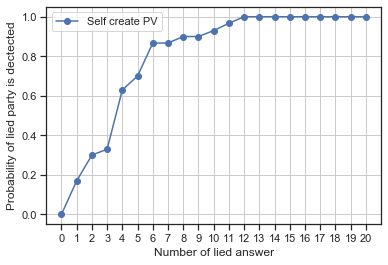

In [2]:
# self generate PV and only keep V in the histogram
num_lie = range(0,21)
prob_detected =[0, 0.17, 0.3, 0.33, 0.63, 0.7, 0.867, 0.867, 0.9, 0.9, 0.93, 0.967, 1, 1, 1, 1, 1, 1, 1, 1, 1]



mc_iter_count = 21



x_stick = range(0,21)
   
    

# plt.title('Passing rate of a partial view with different $v_{opt}$')
plt.grid()
plt.xticks(x_stick, ['0', '1','2','3','4','5','6','7','8','9','10', '11', '12', '13', '14', '15', '16', 
                     '17', '18', '19','20'])
plt.plot(num_lie, prob_detected, '-bo')
plt.legend(['Self create PV'])
plt.xlabel('Number of lied answer')
plt.ylabel('Probability of lied party is dectected')
# plt.savefig('passing_rate_eta_095_L_1000_PV_min.pdf', dpi=300, bbox_inches='tight')
plt.show()

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


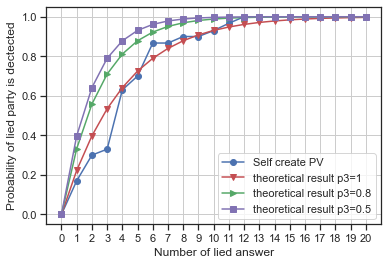

In [8]:

p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10


p1s = [0.5]

p2s_1 =[]


total_round1 = num_query1 + num_test1


num_lies_s1= range(0,21)


for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   



mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]


for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
        
# dataset: 100K
prob_detected =[0, 0.17, 0.3, 0.33, 0.63, 0.7, 0.867, 0.867, 0.9, 0.9, 0.93, 0.967, 1, 1, 1, 1, 1, 1, 1, 1, 1]

x_stick = range(0,21)
   
    

# plt.title('Passing rate of a partial view with different $v_{opt}$')
plt.grid()
plt.xticks(x_stick, ['0', '1','2','3','4','5','6','7','8','9','10', '11', '12', '13', '14', '15', '16', 
                     '17', '18', '19','20'])
plt.plot(num_lie, prob_detected, '-bo', num_lie, pCA1, '-rv',num_lie, pCA2, '-g>',num_lie, pCA3, '-ms')
plt.legend(['Self create PV', 'theoretical result p3=1','theoretical result p3=0.8','theoretical result p3=0.5'])
plt.xlabel('Number of lied answer')
plt.ylabel('Probability of lied party is dectected')
# plt.savefig('passing_rate_eta_095_L_1000_PV_min.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Dataset: 500K, run in EC2

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


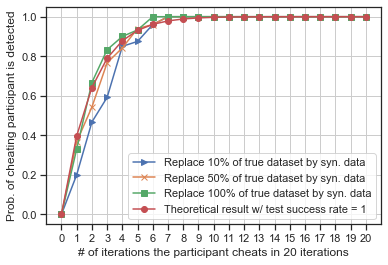

In [2]:
# dataset: 500K
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10


p1s = [0.5]

p2s_1 =[]


total_round1 = num_query1 + num_test1


num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   



mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]

## 5 cases
# pCA_sim_lied_100pc_30runs = [0, 0.33,0.667,0.833,0.9,0.933,0.965,0.9835,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# pCA_sim_lied_80pc_30runs = [0, 0.367,0.6,0.83,0.93,0.93,0.93,0.967,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# pCA_sim_lied_50pc_30runs =[0, 0.367,0.5,0.767,0.83,0.967,0.967,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# pCA_sim_lied_30pc_30runs =[0, 0.367,0.566,0.7,0.9,0.967,1,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# pCA_sim_lied_10pc_30runs =[0, 0.2,0.467,0.592,0.9,0.9,0.967,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## 3 cases
pCA_sim_lied_100pc_30runs = [0,0.33,0.667,0.833,0.9,0.933,1,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

pCA_sim_lied_50pc_30runs =[0, 0.367,0.542857143,0.767,0.842222222,0.9402,0.9602,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

pCA_sim_lied_10pc_30runs =[0, 0.2,0.467,0.592,0.85,0.875,0.9602,1,1,1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]




pCA_sim_scale_1 = [0, 0.15,0.45,0.6,0.65,0.8,0.85,0.8,0.8,0.95,0.9, 1, 1, 1, 1,1,1,1,1,1,1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])

# plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1,  pCA_sim_lied_100pc_30runs, '->', num_lies_s1, pCA_sim_lied_80pc_30runs, '-v',
#          num_lies_s1, pCA_sim_lied_50pc_30runs, '-x', num_lies_s1, pCA_sim_lied_30pc_30runs, '-*',
#         num_lies_s1, pCA_sim_lied_10pc_30runs, '-s', num_lies_s1, pCA_sim_scale_1, '-<')

plt.plot( num_lies_s1,  pCA_sim_lied_10pc_30runs, '->', 
         num_lies_s1, pCA_sim_lied_50pc_30runs, '-x',
        num_lies_s1, pCA_sim_lied_100pc_30runs, '-s',
        num_lies_s1, pCA3, '-o')


# plt.legend(['Theo. res. w/ test success rate = 1', 'Exp. res. w/ 100% syn. data', 
#             'Exp. res. w/ 80% syn. data', 'Exp. res. w/ 50% syn. data', 
#             'Exp. res. w/ 30% syn. data', 'Exp. res. w/ 10% syn. data', 'Exp. res. w/ scaled-up data ($\\omega=1$)'])

# plt.legend(['Exp. res. w/ 10% syn. data', 
#              'Exp. res. w/ 50% syn. data', 
#              'Exp. res. w/ 100% syn. data',
#            'Theo. res. w/ test success rate = 1'])
plt.legend(['Replace 10% of true dataset by syn. data', 
             'Replace 50% of true dataset by syn. data', 
             'Replace 100% of true dataset by syn. data',
           'Theoretical result w/ test success rate = 1'])

plt.xlabel('# of iterations the participant cheats in 20 iterations')
plt.ylabel('Prob. of cheating participant is detected')
plt.savefig('Prob_lied_detected_10_num_query_10_tests_30runs_500K_replacing_10_50_100pc.pdf', dpi=300, bbox_inches='tight')
plt.show()
# print(pCA1)


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


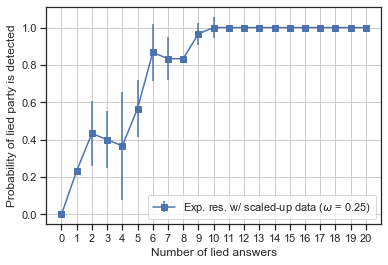

In [12]:
# dataset: 500K
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10


p1s = [0.5]

p2s_1 =[]


total_round1 = num_query1 + num_test1


num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   



mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]



pCA_sim_scale_1 = [0, 0.13,0.5,0.56,0.6,0.76,0.86,0.9,0.95,0.95,1,1,1, 1, 1, 1, 1,1,1,1,1]
pCA_sim_scale_05 = [0, 0.1,0.25,0.53,0.53,0.566,0.866,0.9,0.95,0.95,0.95,1, 1, 1, 1,1,1,1,1,1,1]
pCA_sim_scale_025 = [0, 0.233,0.3,0.4,0.4,0.566,0.9,0.9,0.95,1,1,1, 1, 1, 1, 1,1,1,1,1,1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3

    
    
# plt.grid()
# plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])

# # plt.plot(num_lies_s1, pCA3, '-o',num_lies_s1, pCA2, '-s',num_lies_s1, pCA1, '-v', num_lies_s1, pCA_sim_scale_1, '-<')
# plt.plot(num_lies_s1, pCA1, '-v',num_lies_s1, pCA_sim_scale_1, '-<', num_lies_s1, pCA_sim_scale_05, '-o',
#         num_lies_s1, pCA_sim_scale_025, '-s')

# # plt.legend(['Theo. res. w/ test success rate = 1', 'Theo. res. w/ test success rate = 0.8', 'Theo. res. w/ test success rate = 0.5',
# #             'Exp. res. w/ scale up 100% arbitrary data'])
# plt.legend(['Theo. res. w/ test success rate = 0.5','Exp. res. w/ scaled-up data ($\\omega$ = 1)',
#            'Exp. res. w/ scaled-up data ($\\omega$ = 0.5)', 'Exp. res. w/ scaled-up data ($\\omega$ = 0.25)'])
# plt.xlabel('Number of lied answers')
# plt.ylabel('Probability of lied party is detected')
# # plt.savefig('Prob_lied_detected_10_num_query_10_tests_30runs_scale_omega_1_500K_1.pdf', dpi=300, bbox_inches='tight')
# plt.show()
# # print(pCA1)

x= num_lies_s1
P_omega_1=[0,0.133333333,0.5,0.566666667,0.6,0.766666667,0.866666667,0.833333333,0.766666667,0.9,0.933333333,
   1,1,1,1,1,1,1,1,1,1]
stdev_P_omega_1 = [0,0.057735027,0.1,0.057735027,0.1,0.115470054,0.152752523,0.115470054,0.057735027,0.1,0.057735027,
           0,0,0,0,0,0,0,0,0,0]

P_omega_025=[0,0.233333333,0.433333333,0.4,0.366666667,0.566666667,0.866666667,0.833333333,0.833333333,0.966666667,1,
   1,1,1,1,1,1,1,1,1,1]
stdev_P_omega_025 = [0,0,0.173205081,0.152752523,0.288675135,0.152752523,0.152752523,0.115470054,0,0.057735027,0.057735027,
           0,0,0,0,0,0,0,0,0,0]



fig, ax = plt.subplots()


# ax.errorbar(x, P_omega_1,
#             yerr=stdev_P_omega_1,
#             fmt='-o')

# ax2 = plt.subplots()


ax.errorbar(x, P_omega_025,
            yerr=stdev_P_omega_025,
            fmt='-s')

plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
ax.set_xlabel('Number of lied answers')
ax.set_ylabel('Probability of lied party is detected')
plt.legend(['Exp. res. w/ scaled-up data ($\\omega$ = 0.25)'])
plt.savefig('Prob_lied_detected_10_num_query_10_tests_scale_omega_025_stdev.pdf', dpi=300, bbox_inches='tight')


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


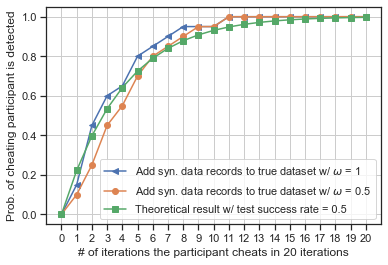

In [6]:
# dataset: 500K
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10


p1s = [0.5]

p2s_1 =[]


total_round1 = num_query1 + num_test1


num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   



mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]


#omega: 0.5: 0.1	0.25	0.45	0.45	0.7	0.8	0.9	1	0.95	0.95
#omega: 0.25: 0.2	0.4	0.45	0.4	0.6	0.8	0.9	0.9	0.95	1

 

# pCA_sim_scale_1 = [0, 0.133333333,0.5,0.566666667,0.6,0.766666667,0.833333333,0.8,0.833333333,0.9,0.933333333,
#                    1,1, 1, 1, 1, 1,1,1,1,1] #over 3 tests

# pCA_sim_scale_05 = [0, 0.1,0.25,0.533333333,0.533333333,0.633333333,0.866666667,0.9,1,0.95,0.95,
#                    1, 1, 1, 1,1,1,1,1,1,1]
# pCA_sim_scale_025 = [0, 0.233333333,0.433333333,0.4,0.366666667,0.566666667,0.866666667,0.833333333,0.833333333,0.966666667,
#                      1,0.933333333,1,1, 1, 1, 1, 1,1,1,1]

# pCA_sim_scale_1 = [0, 0.15,0.45,0.6,0.65,0.8,0.8,0.85,0.85,0.95,0.95,
#                    1,1, 1, 1, 1, 1,1,1,1,1] #over 2 tests
# pCA_sim_scale_05 = [0, 0.1,0.25,0.533,0.6,0.7,0.8,0.9,0.9,0.95,0.95,
#                    1, 1, 1, 1,1,1,1,1,1,1]
# pCA_sim_scale_025 = [0, 0.2,0.4,0.45,0.475,0.6,0.8,0.9,0.9,0.95,1,
#                      1,1,1,1, 1, 1, 1, 1,1,1]

### 100K dataset

# pCA_sim_scale_05 = [0, 0.3,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.8, 0.9,0.9,0.9,0.9,1,1,1,1,1,1]
# pCA_sim_scale_08 = [0, 0.3,0.4,0.4,0.6,0.6,0.7,0.8,0.9,0.9,0.9, 1,1,1,1,1,1,1,1,1,1]
# # pCA_sim_scale_1 = [0, 0.2, 0.4, 0.4, 0.4, 0.7, 0.8, 0.8, 0.9, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1]
# pCA_sim_scale_1 = [0, 0.267, 0.4, 0.5, 0.6, 0.75, 0.76, 0.86, 0.9, 0.93, 0.967, 1, 1, 1, 1,1,1,1,1,1,1]

### May 2/2020

pCA_sim_scale_1 = [0, 0.15,0.45,0.6,0.65,0.8,0.85,0.9,0.95,0.95,0.95, 1,1, 1, 1, 1, 1,1,1,1,1]
pCA_sim_scale_05 = [0, 0.1,0.25,0.45,0.55,0.7,0.8,0.85,0.9,0.95,0.95,1, 1, 1, 1,1,1,1,1,1,1 ]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])

plt.plot(num_lies_s1, pCA_sim_scale_1, '-<',num_lies_s1, pCA_sim_scale_05, '-o',num_lies_s1, pCA1, '-s')

# plt.legend(['Exp. res. w/ scaled-up data ($\\omega$ = 1)','Exp. res. w/ scaled-up data ($\\omega$ = 0.5)',
#            'Theo. res. w/ test success rate = 0.5'])
            
plt.legend(['Add syn. data records to true dataset w/ $\\omega$ = 1',
            'Add syn. data records to true dataset w/ $\\omega$ = 0.5',
           'Theoretical result w/ test success rate = 0.5'])

# plt.plot(num_lies_s1, pCA3, '-v',num_lies_s1, pCA_sim_scale_1, '-<', num_lies_s1, pCA_sim_scale_05, '-o',
#         num_lies_s1, pCA_sim_scale_025, '-s',
#         num_lies_s1, pCA1, '-<')

# plt.legend(['Theo. res. w/ test success rate = 1', 'Theo. res. w/ test success rate = 0.8', 'Theo. res. w/ test success rate = 0.5',
#             'Exp. res. w/ scale up 100% arbitrary data'])
# plt.legend(['Theo. res. w/ test success rate = 1','Exp. res. w/ scaled-up data ($\\omega$ = 1)',
#            'Exp. res. w/ scaled-up data ($\\omega$ = 0.5)', 'Exp. res. w/ scaled-up data ($\\omega$ = 0.25)',
#            'Theo. res. w/ test success rate = 0.5'])
plt.xlabel('# of iterations the participant cheats in 20 iterations')
plt.ylabel('Prob. of cheating participant is detected')
# plt.savefig('Prob_lied_detected_10_num_query_10_tests_30runs_scaleup_500K.pdf', dpi=300, bbox_inches='tight')
plt.show()
# print(pCA1)


In [5]:
print(pCA3)

[0.0, 0.39731231978089987, 0.6415140775914581, 0.7897022361334058, 0.8784233454094307, 0.9307912412260697, 0.9612404689154856, 0.9786656718415209, 0.9884707849539315, 0.9938901007333781, 0.996828788061066, 0.9983902437074802, 0.9992020773370239, 0.9996144546614667, 0.9998187545416366, 0.9999172819387447, 0.9999634384155993, 0.9999843916536398, 0.9999935841560847, 0.9999974696181249, 0.9999990463256836]


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


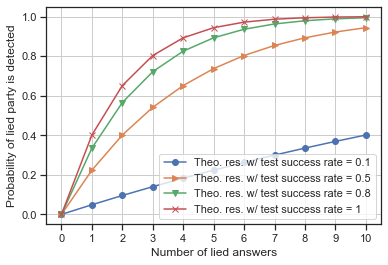

[0.0, 0.048889869534228136, 0.09561792499119559, 0.14026955774085703, 0.1829271931124533, 0.22367037914356236, 0.2625758731050719, 0.2997177258468856, 0.3351673640084992, 0.3689936701379055, 0.4012630607616213]


In [17]:
# Q=5, T =5
p2s = [0, 0.1, 0.2, 0.3,  0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_query1 = 5
num_test1 = 5

# num_query2 = 10
# num_test2 = 5

# num_query3 = 10
# num_test3 = 3

# p1s = [0.5, 0.3, 0.2307]
p1s = [0.5]

p2s_1 =[]
# p2s_2 =[]
# p2s_3 =[]

total_round1 = num_query1 + num_test1
# total_round2 = num_query2 + num_test2
# total_round3 = num_query3 + num_test3

num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10]
# num_lies_s2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# num_lies_s3= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   




# print(num_lies_s1)
# print(num_lies_s2)
# print(num_lies_s3)


mc_iter_count1 = 11
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.1, 0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]
pA4 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]
pCA4 = mc_iter_count1*[None]

# pCA_sim_lied_100pc = [0, 0.2, 0.5, 0.7, 0.8, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# pCA_sim_lied_100pc_30runs = [0, 0.36, 0.73, 0.8, 0.93, 0.86, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# pCA_sim_lied_100pc_40runs =[0, 0.36, 0.615, 0.75, 0.865, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
    
for k in range(mc_iter_count1):
   
    temp_pA4 = (1-p1s[0]*p3s[3]*p2s_1[k])**(num_query1+num_test1)
    pCA4[k] = 1-temp_pA4    
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10'])
plt.plot(num_lies_s1, pCA1, '-o', num_lies_s1, pCA2, '->', num_lies_s1, pCA3, '-v',num_lies_s1, pCA4, '-x')
# plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1, pCA2, '-v',num_lies_s1,  pCA_sim_lied_100pc_40runs, '->')
# plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1,  pCA_sim_lied_100pc_40runs, '->')

# plt.plot(num_lies_s1, pCA1, '-o')
# plt.legend(['Test success rate = 0.5', 'Test success rate = 0.8', 'Test success rate = 1'])
plt.legend(['Theo. res. w/ test success rate = 0.1','Theo. res. w/ test success rate = 0.5', 
            'Theo. res. w/ test success rate = 0.8','Theo. res. w/ test success rate = 1' ])

plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
# plt.savefig('Prob_lied_detected_10_num_query_10_tests_theor_experiment_40runs_new.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


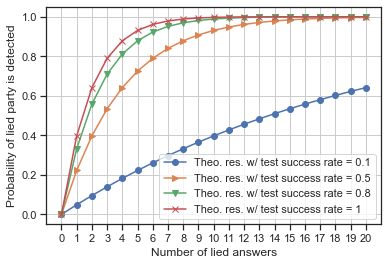

[0.0, 0.04883012474683324, 0.09538951972538245, 0.13977846873815503, 0.18209306240276923, 0.22242536357742537, 0.26086356665289845, 0.29749215092377623, 0.33239202824490577, 0.36564068517223813, 0.39731231978089987, 0.4274779733469445, 0.456205657073253, 0.48356047403405944, 0.5096047365069423, 0.5343980788554963, 0.5579975661205926, 0.5804577984728525, 0.6018310116739696, 0.6221671736895504, 0.6415140775914581]


In [6]:
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10

# num_query2 = 10
# num_test2 = 5

# num_query3 = 10
# num_test3 = 3

# p1s = [0.5, 0.3, 0.2307]
p1s = [0.5]

p2s_1 =[]
# p2s_2 =[]
# p2s_3 =[]

total_round1 = num_query1 + num_test1
# total_round2 = num_query2 + num_test2
# total_round3 = num_query3 + num_test3

num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# num_lies_s2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# num_lies_s3= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   




# print(num_lies_s1)
# print(num_lies_s2)
# print(num_lies_s3)


mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.1, 0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]
pA4 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]
pCA4 = mc_iter_count1*[None]

pCA_sim_lied_100pc = [0, 0.2, 0.5, 0.7, 0.8, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_30runs = [0, 0.36, 0.73, 0.8, 0.93, 0.86, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_40runs =[0, 0.36, 0.615, 0.75, 0.865, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
    
for k in range(mc_iter_count1):
   
    temp_pA4 = (1-p1s[0]*p3s[3]*p2s_1[k])**(num_query1+num_test1)
    pCA4[k] = 1-temp_pA4    
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
plt.plot(num_lies_s1, pCA1, '-o', num_lies_s1, pCA2, '->', num_lies_s1, pCA3, '-v',num_lies_s1, pCA4, '-x')
# plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1, pCA2, '-v',num_lies_s1,  pCA_sim_lied_100pc_40runs, '->')
# plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1,  pCA_sim_lied_100pc_40runs, '->')

# plt.plot(num_lies_s1, pCA1, '-o')
# plt.legend(['Test success rate = 0.5', 'Test success rate = 0.8', 'Test success rate = 1'])
plt.legend(['Theo. res. w/ test success rate = 0.1','Theo. res. w/ test success rate = 0.5', 
            'Theo. res. w/ test success rate = 0.8','Theo. res. w/ test success rate = 1' ])

plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
# plt.savefig('Prob_lied_detected_10_num_query_10_tests_theor_experiment_40runs_new.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


In [8]:
print(pCA4)
print(pCA3)

[0.0, 0.39731231978089987, 0.6415140775914581, 0.7897022361334058, 0.8784233454094307, 0.9307912412260697, 0.9612404689154856, 0.9786656718415209, 0.9884707849539315, 0.9938901007333781, 0.996828788061066, 0.9983902437074802, 0.9992020773370239, 0.9996144546614667, 0.9998187545416366, 0.9999172819387447, 0.9999634384155993, 0.9999843916536398, 0.9999935841560847, 0.9999974696181249, 0.9999990463256836]
[0.0, 0.33239202824490577, 0.5579975661205926, 0.7098937588685386, 0.8113066708372038, 0.8784233454094307, 0.9224372063618104, 0.9510256111816647, 0.96940956017615, 0.9811080386818688, 0.9884707849539315, 0.9930514841291378, 0.9958669387095637, 0.9975754318566747, 0.9985983166046437, 0.9992020773370239, 0.9995531330310419, 0.9997540319427975, 0.9998670772004216, 0.9999295576574453, 0.9999634384155993]


In [6]:
a = 1 - (0.95)**20
a

0.6415140775914581

In [10]:
a = 1 - 0.95**3
a

0.1426250000000001

In [8]:
Prob_detected = []

for num_lied_ans in range(21):
    Prob_detected_tmp = (2**num_lied_ans - 1)/ 2**num_lied_ans   
    Prob_detected.append(Prob_detected_tmp) 
print(Prob_detected)

[0.0, 0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 0.9921875, 0.99609375, 0.998046875, 0.9990234375, 0.99951171875, 0.999755859375, 0.9998779296875, 0.99993896484375, 0.999969482421875, 0.9999847412109375, 0.9999923706054688, 0.9999961853027344, 0.9999980926513672, 0.9999990463256836]


In [14]:
a = (2**10 -1)/2**10
a

0.9990234375

In [8]:
a = 1 - (1 - 0.5*1*1)**20
a

0.9999990463256836

## Theoretical results

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1.0]
[0.0, 0.07692307692307693, 0.15384615384615385, 0.23076923076923078, 0.3076923076923077, 0.38461538461538464, 0.46153846153846156, 0.5384615384615384, 0.6153846153846154, 0.6923076923076923, 0.7692307692307693, 0.8461538461538461, 0.9230769230769231, 1.0]


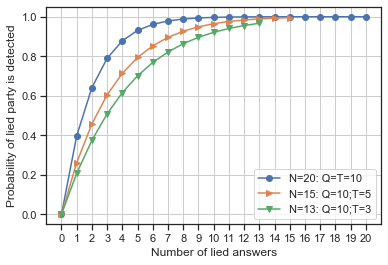

[0.0, 0.39731231978089987, 0.6415140775914581, 0.7897022361334058, 0.8784233454094307, 0.9307912412260697, 0.9612404689154856, 0.9786656718415209, 0.9884707849539315, 0.9938901007333781, 0.996828788061066, 0.9983902437074802, 0.9992020773370239, 0.9996144546614667, 0.9998187545416366, 0.9999172819387447, 0.9999634384155993, 0.9999843916536398, 0.9999935841560847, 0.9999974696181249, 0.9999990463256836]


In [11]:
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10

num_query2 = 10
num_test2 = 5

num_query3 = 10
num_test3 = 3

p1s = [0.5, 0.3, 0.2307]

p2s_1 =[]
p2s_2 =[]
p2s_3 =[]

total_round1 = num_query1 + num_test1
total_round2 = num_query2 + num_test2
total_round3 = num_query3 + num_test3

num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
num_lies_s2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_lies_s3= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   


for num_lied_ans in num_lies_s2:
    if (num_lies_s2 == 0):
         p2s_2_tmp = 0
           
    else:
        p2s_2_tmp = num_lied_ans/ total_round2   
    p2s_2.append(p2s_2_tmp) 
    
print(p2s_2)  

for num_lied_ans in num_lies_s3:
    if (num_lies_s3 == 0):
         p2s_3_tmp = 0
           
    else:
        p2s_3_tmp = num_lied_ans/ total_round3   
    p2s_3.append(p2s_3_tmp) 
    
print(p2s_3)  
    
# for p2 in p2s:
    
#     temp_num_lied2 = total_round2*p2
#     temp_num_lied3 = total_round3*p2
#     num_lies_s1.append(temp_num_lied1)
#     num_lies_s2.append(temp_num_lied2)
#     num_lies_s3.append(temp_num_lied3)
# for p2 in p2s:
#     temp_num_lied1 = total_round1*p2
#     temp_num_lied2 = total_round2*p2
#     temp_num_lied3 = total_round3*p2
#     num_lies_s1.append(temp_num_lied1)
#     num_lies_s2.append(temp_num_lied2)
#     num_lies_s3.append(temp_num_lied3)
    



# print(num_lies_s1)
# print(num_lies_s2)
# print(num_lies_s3)


mc_iter_count1 = 21
mc_iter_count2 = 16
mc_iter_count3 = 14



p3 = 1
 
pA1 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count2*[None]
pCA3 = mc_iter_count3*[None]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count2):
   
    temp_pA2 = (1-p1s[1]*p3*p2s_2[k])**(num_query2+num_test2)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count3):
   
    temp_pA3 = (1-p1s[2]*p3*p2s_3[k])**(num_query3+num_test3)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
plt.plot(num_lies_s1, pCA1, '-o', num_lies_s2, pCA2, '->', num_lies_s3, pCA3, '-v')
plt.legend(['N=20: Q=T=10', 'N=15: Q=10;T=5', 'N=13: Q=10;T=3'])
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
plt.savefig('Prob_lied_detected_p3_10_num_query_10_diff_num_test_vs_num_lied_ans.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


[0.0, 0.5, 0.75, 0.875, 0.9375, 0.96875, 0.984375, 0.9921875, 0.99609375, 0.998046875, 0.9990234375, 0.99951171875, 0.999755859375, 0.9998779296875, 0.99993896484375, 0.999969482421875, 0.9999847412109375, 0.9999923706054688, 0.9999961853027344, 0.9999980926513672, 0.9999990463256836]
[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1.0]
[0.0, 0.07692307692307693, 0.15384615384615385, 0.23076923076923078, 0.3076923076923077, 0.38461538461538464, 0.46153846153846156, 0.5384615384615384, 0.6153846153846154, 0.6923076923076923, 0.7692307692307693, 0.8461538461538461, 0.9230769230769231, 1.0]


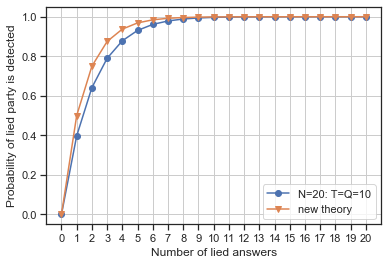

[0.0, 0.39731231978089987, 0.6415140775914581, 0.7897022361334058, 0.8784233454094307, 0.9307912412260697, 0.9612404689154856, 0.9786656718415209, 0.9884707849539315, 0.9938901007333781, 0.996828788061066, 0.9983902437074802, 0.9992020773370239, 0.9996144546614667, 0.9998187545416366, 0.9999172819387447, 0.9999634384155993, 0.9999843916536398, 0.9999935841560847, 0.9999974696181249, 0.9999990463256836]


In [11]:
Prob_detected = []

for num_lied_ans in range(21):
    Prob_detected_tmp = (2**num_lied_ans - 1)/ 2**num_lied_ans   
    Prob_detected.append(Prob_detected_tmp) 
print(Prob_detected)


p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10

num_query2 = 10
num_test2 = 5

num_query3 = 10
num_test3 = 3

p1s = [0.5, 0.3, 0.2307]

p2s_1 =[]
p2s_2 =[]
p2s_3 =[]

total_round1 = num_query1 + num_test1
total_round2 = num_query2 + num_test2
total_round3 = num_query3 + num_test3

num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
num_lies_s2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_lies_s3= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   


for num_lied_ans in num_lies_s2:
    if (num_lies_s2 == 0):
         p2s_2_tmp = 0
           
    else:
        p2s_2_tmp = num_lied_ans/ total_round2   
    p2s_2.append(p2s_2_tmp) 
    
print(p2s_2)  

for num_lied_ans in num_lies_s3:
    if (num_lies_s3 == 0):
         p2s_3_tmp = 0
           
    else:
        p2s_3_tmp = num_lied_ans/ total_round3   
    p2s_3.append(p2s_3_tmp) 
    
print(p2s_3)  
    
mc_iter_count1 = 21
mc_iter_count2 = 16
mc_iter_count3 = 14



p3 = 1
 
pA1 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count2*[None]
pCA3 = mc_iter_count3*[None]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count2):
   
    temp_pA2 = (1-p1s[1]*p3*p2s_2[k])**(num_query2+num_test2)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count3):
   
    temp_pA3 = (1-p1s[2]*p3*p2s_3[k])**(num_query3+num_test3)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
# plt.plot(num_lies_s1, pCA1, '-o', num_lies_s2, pCA2, '->', num_lies_s3, pCA3, '-v')

plt.plot(num_lies_s1, pCA1, '-o', num_lies_s1, Prob_detected, '-v')

# plt.legend(['N=20: T=Q=10', 'N=15: Q=10;T=5', 'N=13: Q=10;T=3'])
plt.legend(['N=20: T=Q=10', 'new theory'])
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
# plt.savefig('Prob_lied_detected_p3_10_num_query_10_diff_num_test_vs_num_lied_ans.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


## Dataset = 100K

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


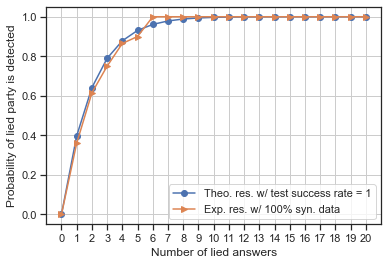

[0.0, 0.22242536357742537, 0.39731231978089987, 0.5343980788554963, 0.6415140775914581, 0.7249412101116637, 0.7897022361334058, 0.8398018625003146, 0.8784233454094307, 0.9080890543367485, 0.9307912412260697, 0.9480982412204796, 0.9612404689154856, 0.9711798448686568, 0.9786656718415209, 0.984279462423146, 0.9884707849539315, 0.9915858306398998, 0.9938901007333781, 0.9955863594565079, 0.996828788061066]


In [9]:
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10

# num_query2 = 10
# num_test2 = 5

# num_query3 = 10
# num_test3 = 3

# p1s = [0.5, 0.3, 0.2307]
p1s = [0.5]

p2s_1 =[]
# p2s_2 =[]
# p2s_3 =[]

total_round1 = num_query1 + num_test1
# total_round2 = num_query2 + num_test2
# total_round3 = num_query3 + num_test3

num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# num_lies_s2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# num_lies_s3= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   





mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]

pCA_sim_lied_100pc = [0, 0.2, 0.5, 0.7, 0.8, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_30runs = [0, 0.36, 0.73, 0.8, 0.93, 0.86, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_40runs =[0, 0.36, 0.615, 0.75, 0.865, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
# plt.plot(num_lies_s1, pCA1, '-o', num_lies_s1, pCA2, '->', num_lies_s1, pCA3, '-v')
# plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1, pCA2, '-v',num_lies_s1,  pCA_sim_lied_100pc_40runs, '->')
plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1,  pCA_sim_lied_100pc_40runs, '->')

# plt.plot(num_lies_s1, pCA1, '-o')
# plt.legend(['Test success rate = 0.5', 'Test success rate = 0.8', 'Test success rate = 1'])
# plt.legend(['Theoretical result w/ test success rate = 1','Theoretical result w/ test success rate = 0.8', 'Experimental result'])
plt.legend(['Theo. res. w/ test success rate = 1', 'Exp. res. w/ 100% syn. data'])
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
plt.savefig('Prob_lied_detected_10_num_query_10_tests_theor_experiment_40runs_new.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


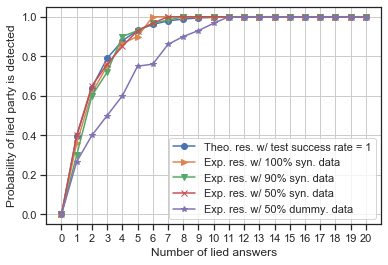

[0.0, 0.22242536357742537, 0.39731231978089987, 0.5343980788554963, 0.6415140775914581, 0.7249412101116637, 0.7897022361334058, 0.8398018625003146, 0.8784233454094307, 0.9080890543367485, 0.9307912412260697, 0.9480982412204796, 0.9612404689154856, 0.9711798448686568, 0.9786656718415209, 0.984279462423146, 0.9884707849539315, 0.9915858306398998, 0.9938901007333781, 0.9955863594565079, 0.996828788061066]


In [7]:
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10

# num_query2 = 10
# num_test2 = 5

# num_query3 = 10
# num_test3 = 3

# p1s = [0.5, 0.3, 0.2307]
p1s = [0.5]

p2s_1 =[]
# p2s_2 =[]
# p2s_3 =[]

total_round1 = num_query1 + num_test1
# total_round2 = num_query2 + num_test2
# total_round3 = num_query3 + num_test3

num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# num_lies_s2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# num_lies_s3= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   


# for num_lied_ans in num_lies_s2:
#     if (num_lies_s2 == 0):
#          p2s_2_tmp = 0
           
#     else:
#         p2s_2_tmp = num_lied_ans/ total_round2   
#     p2s_2.append(p2s_2_tmp) 
    
# print(p2s_2)  

# for num_lied_ans in num_lies_s3:
#     if (num_lies_s3 == 0):
#          p2s_3_tmp = 0
           
#     else:
#         p2s_3_tmp = num_lied_ans/ total_round3   
#     p2s_3.append(p2s_3_tmp) 
    
# print(p2s_3)  
    
# for p2 in p2s:
    
#     temp_num_lied2 = total_round2*p2
#     temp_num_lied3 = total_round3*p2
#     num_lies_s1.append(temp_num_lied1)
#     num_lies_s2.append(temp_num_lied2)
#     num_lies_s3.append(temp_num_lied3)
# for p2 in p2s:
#     temp_num_lied1 = total_round1*p2
#     temp_num_lied2 = total_round2*p2
#     temp_num_lied3 = total_round3*p2
#     num_lies_s1.append(temp_num_lied1)
#     num_lies_s2.append(temp_num_lied2)
#     num_lies_s3.append(temp_num_lied3)
    



# print(num_lies_s1)
# print(num_lies_s2)
# print(num_lies_s3)


mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]

pCA_sim_lied_100pc = [0, 0.2, 0.5, 0.7, 0.8, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_30runs = [0, 0.36, 0.73, 0.8, 0.93, 0.86, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_40runs =[0, 0.36, 0.615, 0.75, 0.865, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

pCA_sim_lied_90pc = [0, 0.3, 0.6, 0.72, 0.9, 0.93, 0.967, 0.983, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]
pCA_sim_lied_50pc = [0, 0.4, 0.65, 0.76, 0.85, 0.93, 0.967, 1, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]

pCA_sim_scale_1 = [0, 0.267, 0.4, 0.5, 0.6, 0.75, 0.76, 0.86, 0.9, 0.93, 0.967, 1, 1, 1, 1,1,1,1,1,1,1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
# plt.plot(num_lies_s1, pCA1, '-o', num_lies_s1, pCA2, '->', num_lies_s1, pCA3, '-v')
plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1,  pCA_sim_lied_100pc_40runs, '->', num_lies_s1, pCA_sim_lied_90pc, '-v',num_lies_s1, pCA_sim_lied_50pc, '-x', num_lies_s1, pCA_sim_scale_1, '-*')
# plt.plot(num_lies_s1, pCA1, '-o')
# plt.legend(['Test success rate = 0.5', 'Test success rate = 0.8', 'Test success rate = 1'])
plt.legend(['Theo. res. w/ test success rate = 1', 'Exp. res. w/ 100% syn. data', 'Exp. res. w/ 90% syn. data', 'Exp. res. w/ 50% syn. data', 'Exp. res. w/ 50% dummy. data'])
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
# plt.savefig('Prob_lied_detected_10_num_query_10_tests_theor_experiment_40runs_syndata.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


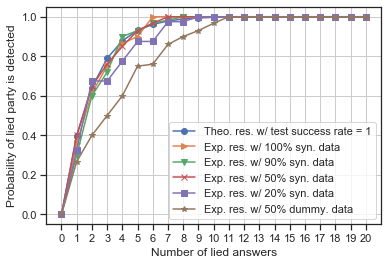

[0.0, 0.22242536357742537, 0.39731231978089987, 0.5343980788554963, 0.6415140775914581, 0.7249412101116637, 0.7897022361334058, 0.8398018625003146, 0.8784233454094307, 0.9080890543367485, 0.9307912412260697, 0.9480982412204796, 0.9612404689154856, 0.9711798448686568, 0.9786656718415209, 0.984279462423146, 0.9884707849539315, 0.9915858306398998, 0.9938901007333781, 0.9955863594565079, 0.996828788061066]


In [16]:
# Dataset: 100K, L = 500

p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10

# num_query2 = 10
# num_test2 = 5

# num_query3 = 10
# num_test3 = 3

# p1s = [0.5, 0.3, 0.2307]
p1s = [0.5]

p2s_1 =[]
# p2s_2 =[]
# p2s_3 =[]

total_round1 = num_query1 + num_test1
# total_round2 = num_query2 + num_test2
# total_round3 = num_query3 + num_test3

num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# num_lies_s2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# num_lies_s3= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   



mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]

pCA_sim_lied_100pc = [0, 0.2, 0.5, 0.7, 0.8, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_30runs = [0, 0.36, 0.73, 0.8, 0.93, 0.86, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_40runs =[0, 0.36, 0.615, 0.75, 0.865, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

pCA_sim_lied_90pc = [0, 0.3, 0.6, 0.72, 0.9, 0.93, 0.967, 0.983, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]
pCA_sim_lied_50pc = [0, 0.4, 0.65, 0.76, 0.85, 0.93, 0.967, 1, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]
pCA_sim_lied_20pc = [0, 0.325, 0.675, 0.675, 0.775, 0.875, 0.875, 0.975, 0.975, 1,1,1,1,1, 1, 1,1,1,1,1,1]

pCA_sim_scale_1 = [0, 0.267, 0.4, 0.5, 0.6, 0.75, 0.76, 0.86, 0.9, 0.93, 0.967, 1, 1, 1, 1,1,1,1,1,1,1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
# plt.plot(num_lies_s1, pCA1, '-o', num_lies_s1, pCA2, '->', num_lies_s1, pCA3, '-v')
plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1,  pCA_sim_lied_100pc_40runs, '->', 
         num_lies_s1, pCA_sim_lied_90pc, '-v',num_lies_s1, pCA_sim_lied_50pc, '-x', 
         num_lies_s1, pCA_sim_lied_20pc, '-s', num_lies_s1, pCA_sim_scale_1, '-*')
# plt.plot(num_lies_s1, pCA1, '-o')
# plt.legend(['Test success rate = 0.5', 'Test success rate = 0.8', 'Test success rate = 1'])
plt.legend(['Theo. res. w/ test success rate = 1', 'Exp. res. w/ 100% syn. data', 'Exp. res. w/ 90% syn. data', 
            'Exp. res. w/ 50% syn. data', 'Exp. res. w/ 20% syn. data', 'Exp. res. w/ 50% dummy. data'])
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
plt.savefig('Prob_lied_detected_10_num_query_10_tests_theor_experiment_40runs_2.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


In [ ]:
# Dataset: 500K, L = 1000

p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query1 = 10
num_test1 = 10

p1s = [0.5]

p2s_1 =[]
# p2s_2 =[]
# p2s_3 =[]

total_round1 = num_query1 + num_test1
# total_round2 = num_query2 + num_test2
# total_round3 = num_query3 + num_test3

num_lies_s1= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# num_lies_s2= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# num_lies_s3= [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

for num_lied_ans in num_lies_s1:
    if (num_lies_s1 == 0):
         p2s_1_tmp = 0
           
    else:
        p2s_1_tmp = num_lied_ans/ total_round1   
    p2s_1.append(p2s_1_tmp) 
    
print(p2s_1)   



mc_iter_count1 = 21
# mc_iter_count2 = 16
# mc_iter_count3 = 14



p3s = [0.5, 0.8, 1]
 
pA1 = mc_iter_count1*[None]
pA2 = mc_iter_count1*[None]
pA3 = mc_iter_count1*[None]

pCA1 = mc_iter_count1*[None]
pCA2 = mc_iter_count1*[None]
pCA3 = mc_iter_count1*[None]

pCA_sim_lied_100pc = [0, 0.2, 0.5, 0.7, 0.8, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_30runs = [0, 0.36, 0.73, 0.8, 0.93, 0.86, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_40runs =[0, 0.36, 0.615, 0.75, 0.865, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

pCA_sim_lied_90pc = [0, 0.3, 0.6, 0.72, 0.9, 0.93, 0.967, 0.983, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]
pCA_sim_lied_50pc = [0, 0.4, 0.65, 0.76, 0.85, 0.93, 0.967, 1, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]
pCA_sim_lied_20pc = [0, 0.325, 0.675, 0.675, 0.775, 0.875, 0.875, 0.975, 0.975, 1,1,1,1,1, 1, 1,1,1,1,1,1]

pCA_sim_scale_1 = [0, 0.267, 0.4, 0.5, 0.6, 0.75, 0.76, 0.86, 0.9, 0.93, 0.967, 1, 1, 1, 1,1,1,1,1,1,1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count1):
    temp_pA1 = (1-p1s[0]*p3s[0]*p2s_1[k])**(num_query1+num_test1)
    
    pCA1[k] = 1-temp_pA1
    
    
for k in range(mc_iter_count1):
   
    temp_pA2 = (1-p1s[0]*p3s[1]*p2s_1[k])**(num_query1+num_test1)
    
    pCA2[k] = 1-temp_pA2
   
    
for k in range(mc_iter_count1):
   
    temp_pA3 = (1-p1s[0]*p3s[2]*p2s_1[k])**(num_query1+num_test1)
    pCA3[k] = 1-temp_pA3
        
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
# plt.plot(num_lies_s1, pCA1, '-o', num_lies_s1, pCA2, '->', num_lies_s1, pCA3, '-v')
plt.plot(num_lies_s1, pCA3, '-o', num_lies_s1,  pCA_sim_lied_100pc_40runs, '->', 
         num_lies_s1, pCA_sim_lied_90pc, '-v',num_lies_s1, pCA_sim_lied_50pc, '-x', 
         num_lies_s1, pCA_sim_lied_20pc, '-s', num_lies_s1, pCA_sim_scale_1, '-*')
# plt.plot(num_lies_s1, pCA1, '-o')
# plt.legend(['Test success rate = 0.5', 'Test success rate = 0.8', 'Test success rate = 1'])
plt.legend(['Theo. res. w/ test success rate = 1', 'Exp. res. w/ 100% syn. data', 'Exp. res. w/ 90% syn. data', 
            'Exp. res. w/ 50% syn. data', 'Exp. res. w/ 20% syn. data', 'Exp. res. w/ 50% dummy. data'])
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
# plt.savefig('Prob_lied_detected_10_num_query_10_tests_theor_experiment_40runs_2.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


In [2]:
pCA_sim_lied_100pc = [0, 0.2, 0.5, 0.7, 0.8, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_30runs = [0, 0.36, 0.73, 0.8, 0.93, 0.86, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_100pc_40runs =[0, 36, 0.61, 0.8, 0.915, 0.93, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

TypeError: unsupported operand type(s) for /: 'list' and 'int'

## Experimental results: keep a portion of true records

[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20]
[0.0, 0.39731231978089987, 0.6415140775914581, 0.7897022361334058, 0.8784233454094307, 0.9307912412260697, 0.9612404689154856, 0.9786656718415209, 0.9884707849539315, 0.9938901007333781, 0.996828788061066, 0.9983902437074802, 0.9992020773370239, 0.9996144546614667, 0.9998187545416366, 0.9999172819387447, 0.9999634384155993, 0.9999843916536398, 0.9999935841560847, 0.9999974696181249, 0.9999990463256836]


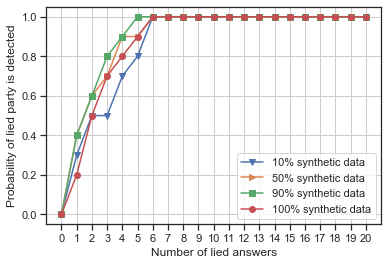

In [13]:
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

# p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
num_query = 10
num_test = 10

total_round = num_query + num_test
num_lies_s= []

for p2 in p2s:
    temp_num_lied = total_round*p2
    num_lies_s.append(temp_num_lied)

print(num_lies_s)


mc_iter_count = 21



p3 = 1
p1 = 0.5
pA1 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]

pCA_sim_lied_100pc = [0, 0.2, 0.5, 0.7, 0.8, 0.9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
pCA_sim_lied_90pc = [0, 0.4, 0.6, 0.8, 0.9, 1, 1, 1, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]
pCA_sim_lied_50pc = [0, 0.4, 0.6, 0.7, 0.9, 0.9, 1, 1, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]
pCA_sim_lied_10pc = [0, 0.3, 0.5, 0.5, 0.7, 0.8, 1, 1, 1, 1,1,1,1,1, 1, 1,1,1,1,1,1]
pCA_sim_scale_1 = [0, 0.2, 0.4, 0.4, 0.4, 0.7, 0.8, 0.8, 0.9, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1]
# pCA_sim_lied_scaled_up = [0, 0, 0.4, 0.4, 0.45, 0.7, 0.9, 1, 1, 0.9, 1,0.95,1, 1, 1,1,1,1,1,1,1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(num_query+num_test)
    pCA1[k] = 1-temp_pA
    
print(pCA1)
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
# plt.xticks(x_stick, ['0','2','4','6','8','10','12','14','16','18','20'])
# plt.plot(num_lies_s, pCA1, '-o',num_lies_s, pCA_sim_lied_scaled_up, '-v', num_lies_s, pCA_sim_lied_90pc,'->' )
# plt.plot(num_lies_s, pCA_sim_lied_90pc,'->',  num_lies_s, pCA_sim_lied_50pc,'-v', num_lies_s, pCA_sim_lied_10pc,'-*'
#         ,num_lies_s, pCA_sim_scale_1, '-o')
plt.plot(num_lies_s, pCA_sim_lied_10pc,'-v',num_lies_s, pCA_sim_lied_50pc,'->', 
         num_lies_s, pCA_sim_lied_90pc,'-s',num_lies_s, pCA_sim_lied_100pc,'-o')
# plt.plot(num_lies_s, pCA_sim_lied_scaled_up, '-o', num_lies_s, pCA_sim_lied_90pc,'->',  num_lies_s, pCA_sim_lied_50pc,'-v', num_lies_s, pCA_sim_lied_10pc,'-*' )
# plt.legend(['scaled up', 'amount_lie_90','amount_of_lie_50', 'amount_of_lie_10'])

# plt.legend(['keep 10% true data','keep 50% true data', 'keep 90% true data', '$\omega = 1$'])
plt.legend(['10% synthetic data','50% synthetic data','90% synthetic data', '100% synthetic data'])         
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
# plt.savefig('Prob_lied_detected_p3_10_num_query_10_num_test_10_sim_amount_lie.pdf', dpi=300, bbox_inches='tight')
plt.show()



## Experimental result: Adding dummy bin '1' with adding factor $0 < \omega \leq (a-1)$

[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


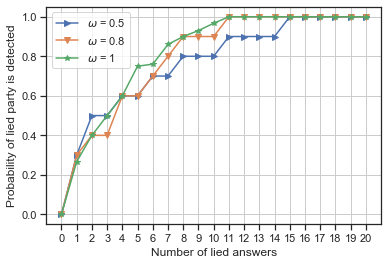

In [6]:
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

# p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
num_query = 10
num_test = 10

total_round = num_query + num_test
num_lies_s= []

for p2 in p2s:
    temp_num_lied = total_round*p2
    num_lies_s.append(temp_num_lied)

print(num_lies_s)


mc_iter_count = 21



p3 = 1
p1 = 0.5
pA1 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]

pCA_sim_scale_05 = [0, 0.3,0.5,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.8, 0.9,0.9,0.9,0.9,1,1,1,1,1,1]
pCA_sim_scale_08 = [0, 0.3,0.4,0.4,0.6,0.6,0.7,0.8,0.9,0.9,0.9, 1,1,1,1,1,1,1,1,1,1]
# pCA_sim_scale_1 = [0, 0.2, 0.4, 0.4, 0.4, 0.7, 0.8, 0.8, 0.9, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1]
pCA_sim_scale_1 = [0, 0.267, 0.4, 0.5, 0.6, 0.75, 0.76, 0.86, 0.9, 0.93, 0.967, 1, 1, 1, 1,1,1,1,1,1,1]

# pCA_sim_lied_scaled_up = [0, 0, 0.4, 0.4, 0.45, 0.7, 0.9, 1, 1, 0.9, 1,0.95,1, 1, 1,1,1,1,1,1,1]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]


    
print(pCA1)
plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])

plt.plot(num_lies_s, pCA_sim_scale_05,'->',  num_lies_s, pCA_sim_scale_08,'-v', num_lies_s, pCA_sim_scale_1,'-*' )

plt.legend(['$\omega$ = 0.5','$\omega$ = 0.8', '$\omega$ = 1'])
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
plt.savefig('Prob_lied_detected_p3_10_num_query_10_num_test_10_sim_scale_up.pdf', dpi=300, bbox_inches='tight')
plt.show()



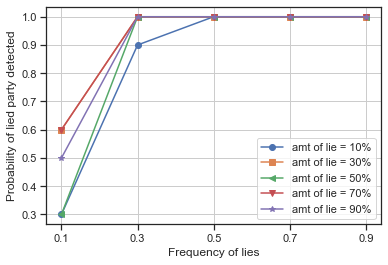

In [9]:
#Given p1 = 0.5, change number of queries 10, 20, 30
freq_lie_s = [0.1, 0.3, 0.5, 0.7, 0.9]
num_query = 10
num_test = 10

lie_amount_s = [0.1, 0.3, 0.5, 0.7, 0.9]






pCA_09 = [0.5, 1, 1, 1, 1]
pCA_07 = [0.6, 1, 1, 1, 1]
pCA_05 = [0.3, 1, 1, 1, 1]
pCA_03 = [0.6, 1, 1, 1, 1]
pCA_01 = [0.3, 0.9, 1, 1, 1]



x_stick = [0.1, 0.3, 0.5, 0.7, 0.9]


        
#ks = [k for k in range(0:0.1:1)]
# plt.title('Test success rate $p_3 = 0.8$')
plt.grid()
plt.xticks(x_stick, ['0.1','0.3','0.5','0.7','0.9'])
# plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<')
# plt.legend(['$No. queries$ = ' + str(num_query_s[0]), '$No. queries$ = ' + str(num_query_s[1]), '$No. queries$ = ' + str(num_query_s[2])])

plt.plot(freq_lie_s, pCA_01, '-o', freq_lie_s, pCA_03, '-s', freq_lie_s, pCA_05, '-<',freq_lie_s, pCA_07, '-v', freq_lie_s, pCA_09, '-*')
# plt.legend(['amt of lie = '+ str(lie_amount_s[0]), 'amt of lie = ' + str(lie_amount_s[1]), 'amt of lie = ' + str(lie_amount_s[2]),
#             'amt of lie = ' + str(lie_amount_s[3]), 'amt of lie = ' + str(lie_amount_s[4])])

plt.legend(['amt of lie = 10%', 'amt of lie = 30%', 'amt of lie = 50%',
            'amt of lie = 70%', 'amt of lie = 90%'])

plt.xlabel('Frequency of lies')
plt.ylabel('Probability of lied party detected')
plt.savefig('Experiment_Prob_lied_detected_p1_05_vs_10_queries.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Effect of number of queries

3
5
8
10
13
15


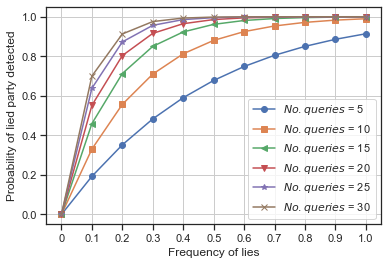

[0.0, 0.19268221166653, 0.3520619044935621, 0.4832000238151609, 0.5904996056355059, 0.677776061691926, 0.7483216752563786, 0.8049646347467259, 0.8501229227053998, 0.8858533681892906, 0.9138961611009453]
[0.0, 0.33056490205459577, 0.5567738855484482, 0.7099454654814832, 0.8125105400439667, 0.8803821815452011, 0.9247362415093205, 0.9533380842744381, 0.9715223905953707, 0.982909950742747, 0.9899268056071272]
[0.0, 0.45955313729391634, 0.7128169155235431, 0.850099823468526, 0.9232229922088183, 0.9614562754456745, 0.9810577433491573, 0.9908992762230475, 0.9957318591340969, 0.9980492284398055, 0.9991326592927973]


In [31]:
#Given p1 = 0.5, change number of queries 10, 20, 30
p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_query_s = [5, 10, 15, 20, 25, 30]
num_test_s = num_query_s

ds =[]
mc_iter_count = 11

p3 = 0.8
p1 = 0.33

for num_query in num_query_s:
    num_test = (int)(math.ceil(p1*num_query/(1-p1)))
    print(num_test)
    temp_d = num_test + num_query
    ds.append(temp_d)


pA1 = mc_iter_count*[None]
pA2 = mc_iter_count*[None]
pA3 = mc_iter_count*[None]
pA4 = mc_iter_count*[None]
pA5 = mc_iter_count*[None]
pA6 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]
pCA2 = mc_iter_count*[None]
pCA3 = mc_iter_count*[None]
pCA4 = mc_iter_count*[None]
pCA5 = mc_iter_count*[None]
pCA6 = mc_iter_count*[None]

x_stick = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[0])
    pCA1[k] = 1-temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[1])
    pCA2[k] = 1 - temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[2])
    pCA3[k] = 1 - temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[3])
    pCA4[k] = 1 - temp_pA      
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[4])
    pCA5[k] = 1 - temp_pA          
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[5])
    pCA6[k] = 1 - temp_pA          
        
#ks = [k for k in range(0:0.1:1)]
# plt.title('Test success rate $p_3 = 0.8$')
plt.grid()
plt.xticks(x_stick, ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '1.0'])
# plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<')
# plt.legend(['$No. queries$ = ' + str(num_query_s[0]), '$No. queries$ = ' + str(num_query_s[1]), '$No. queries$ = ' + str(num_query_s[2])])

plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<',p2s, pCA4, '-v', p2s, pCA5, '-*', p2s, pCA6, '-x')
plt.legend(['$No. queries$ = ' + str(num_query_s[0]), '$No. queries$ = ' + str(num_query_s[1]), '$No. queries$ = ' + str(num_query_s[2]),
            '$No. queries$ = ' + str(num_query_s[3]), '$No. queries$ = ' + str(num_query_s[4]), '$No. queries$ = ' + str(num_query_s[5])])

plt.xlabel('Frequency of lies')
plt.ylabel('Probability of lied party detected')
plt.savefig('Prob_lied_detected_p3_08_p1_033_vs_6_diff_no_queries.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)
print(pCA2)
print(pCA3)

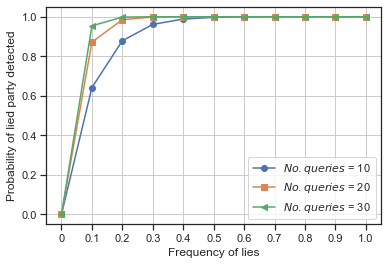

[0.0, 0.6415140775914581, 0.8784233454094307, 0.9612404689154856, 0.9884707849539315, 0.996828788061066, 0.9992020773370239, 0.9998187545416366, 0.9999634384155993, 0.9999935841560847, 0.9999990463256836]
[0.0, 0.8714878434348969, 0.9852191170585654, 0.9984976987501085, 0.9998670772004216, 0.9999899434148384, 0.999999363319424, 0.9999999671500838, 0.9999999986632505, 0.9999999999588369, 0.9999999999990905]
[0.0, 0.953930201013048, 0.9982029897000856, 0.9999417715080066, 0.9999984675044591, 0.999999968108437, 0.9999999994919782, 0.9999999999940461, 0.9999999999999512, 0.9999999999999998, 1.0]


In [17]:
#Given p1 = 0.5, change number of queries 10, 20, 30
p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_query_s = [10, 20, 30]
num_test_s = num_query_s

# p1s = []
# ds =[]
mc_iter_count = 11
# p1s = [0.5, 0.3, 0.1]

# for num_test in num_test_s:
# #     temp_p1 = num_test/(num_query+num_test)  
#     temp_d = num_query + num_test
# #     p1s.append(temp_p1)
#     ds.append(temp_d)
    
# print(ds)   
# print(num_test_s)

# d = num_query + num_test
p3 = 1
p1 = 0.5
pA1 = mc_iter_count*[None]
pA2 = mc_iter_count*[None]
pA3 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]
pCA2 = mc_iter_count*[None]
pCA3 = mc_iter_count*[None]

x_stick = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(2*num_query_s[0])
    pCA1[k] = 1-temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(2*num_query_s[1])
    pCA2[k] = 1 - temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(2*num_query_s[2])
    pCA3[k] = 1 - temp_pA        
    
#ks = [k for k in range(0:0.1:1)]
# plt.title('Test success rate $p_3 = 0.8$')
plt.grid()
plt.xticks(x_stick, ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '1.0'])
plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<')
plt.legend(['$No. queries$ = ' + str(num_query_s[0]), '$No. queries$ = ' + str(num_query_s[1]), '$No. queries$ = ' + str(num_query_s[2])])
plt.xlabel('Frequency of lies')
plt.ylabel('Probability of lied party detected')
plt.savefig('Prob_lied_detected_p3_1_p1_05_vs_no_queries.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)
print(pCA2)
print(pCA3)

3
5
8
[13, 25, 38]


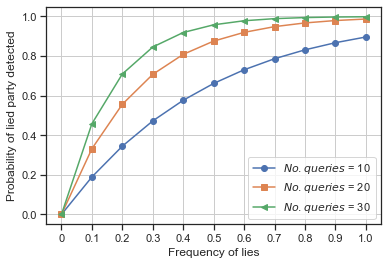

[0.0, 0.1891579189427659, 0.3447913157440915, 0.472429711664907, 0.576760655011181, 0.6617469233575086, 0.7307289919518694, 0.7865144153655507, 0.8314556090229546, 0.8675173700577674, 0.896335342105488]
[0.0, 0.33184463372639617, 0.5565098967723565, 0.7076361248592719, 0.8086201462109354, 0.8756357131977053, 0.919793279009672, 0.9486755688663147, 0.9674229223281845, 0.9794957392098008, 0.9872067127423974]
[0.0, 0.45823151234115267, 0.7094214329836986, 0.845757506093241, 0.9190005160382604, 0.9579333973646746, 0.9784026553866992, 0.9890429738133947, 0.994509316283992, 0.997283541605493, 0.9986737882530944]


In [30]:
#Given p1 = 0.5, change number of queries 10, 20, 30
p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_query_s = [10, 20, 30]
# num_test_s = num_query_s

# p1s = []
ds =[]
mc_iter_count = 11
# p1s = [0.5, 0.3, 0.1]

# for num_test in num_test_s:
# #     temp_p1 = num_test/(num_query+num_test)  
#     temp_d = num_query + num_test
# #     p1s.append(temp_p1)
#     ds.append(temp_d)
    
# print(ds)   
# print(num_test_s)

# d = num_query + num_test
p3 = 0.8
p1 = 0.2

for num_query in num_query_s:
    num_test = (int)(math.ceil(p1*num_query/(1-p1)))
    print(num_test)
    temp_d = num_test + num_query
    ds.append(temp_d)

print(ds)
pA1 = mc_iter_count*[None]
pA2 = mc_iter_count*[None]
pA3 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]
pCA2 = mc_iter_count*[None]
pCA3 = mc_iter_count*[None]

x_stick = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[0])
    pCA1[k] = 1-temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[1])
    pCA2[k] = 1 - temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(ds[2])
    pCA3[k] = 1 - temp_pA        
    
#ks = [k for k in range(0:0.1:1)]
# plt.title('Test success rate $p_3 = 0.8$')
plt.grid()
plt.xticks(x_stick, ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '1.0'])
plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<')
plt.legend(['$No. queries$ = ' + str(num_query_s[0]), '$No. queries$ = ' + str(num_query_s[1]), '$No. queries$ = ' + str(num_query_s[2])])
plt.xlabel('Frequency of lies')
plt.ylabel('Probability of lied party detected')
plt.savefig('Prob_lied_detected_p3_08_p1_02_vs_3_diff_no_queries.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)
print(pCA2)
print(pCA3)

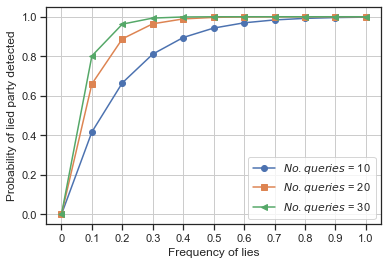

[0.0, 0.4172666133786199, 0.6654731056745591, 0.8109782372935198, 0.8949713349666474, 0.9426705133498312, 0.9692928140532313, 0.9838800130262676, 0.9917173341437282, 0.9958407567053591, 0.9979620831825659]
[0.0, 0.6604218001167772, 0.8880917569729753, 0.9642707732233351, 0.9889689795213118, 0.9967133299604282, 0.9990570687312306, 0.9997401460199667, 0.9999313974463133, 0.999982700695216, 0.9999958468950452]
[0.0, 0.8021164455592575, 0.9625636830107528, 0.9932463985745352, 0.9988414266451678, 0.9998115768938428, 0.9999710452341949, 0.9999958111572268, 0.9999994317879709, 0.9999999280479825, 0.9999999915363176]


In [19]:
#Given p1 = 0.5, change number of queries 10, 20, 30
p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_query_s = [10, 20, 30]
num_test_s = num_query_s

# p1s = []
# ds =[]
mc_iter_count = 11
# p1s = [0.5, 0.3, 0.1]

# for num_test in num_test_s:
# #     temp_p1 = num_test/(num_query+num_test)  
#     temp_d = num_query + num_test
# #     p1s.append(temp_p1)
#     ds.append(temp_d)
    
# print(ds)   
# print(num_test_s)

# d = num_query + num_test
p3 = 0.8
p1 = 0.333
pA1 = mc_iter_count*[None]
pA2 = mc_iter_count*[None]
pA3 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]
pCA2 = mc_iter_count*[None]
pCA3 = mc_iter_count*[None]

x_stick = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(2*num_query_s[0])
    pCA1[k] = 1-temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(2*num_query_s[1])
    pCA2[k] = 1 - temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(2*num_query_s[2])
    pCA3[k] = 1 - temp_pA        
    
#ks = [k for k in range(0:0.1:1)]
# plt.title('Test success rate $p_3 = 0.8$')
plt.grid()
plt.xticks(x_stick, ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '1.0'])
plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<')
plt.legend(['$No. queries$ = ' + str(num_query_s[0]), '$No. queries$ = ' + str(num_query_s[1]), '$No. queries$ = ' + str(num_query_s[2])])
plt.xlabel('Frequency of lies')
plt.ylabel('Probability of lied party detected')
plt.savefig('Prob_lied_detected_p3_08_p1_033_vs_no_queries.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)
print(pCA2)
print(pCA3)

[0.16666666666666666, 0.3333333333333333, 0.5]
[2, 5, 10]


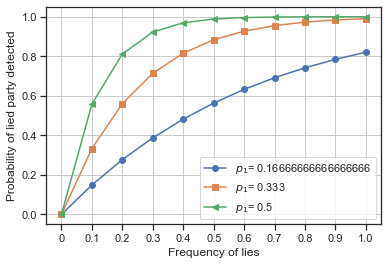

[0.0, 0.14877283231905525, 0.2769985625528604, 0.38729024267023293, 0.4819579373228584, 0.5630403655547607, 0.6323336123451175, 0.6914171457314031, 0.7416773592359098, 0.7843288441783189, 0.8204335821630582]
[0.0, 0.33330998473155804, 0.5605026306492719, 0.7137025959297949, 0.8158366994865066, 0.8831089125962188, 0.9268542173896324, 0.9549153633121639, 0.9726560517306965, 0.9836993889725665, 0.990460592711667]
[0.0, 0.5579975661205926, 0.8113066708372038, 0.9224372063618104, 0.96940956017615, 0.9884707849539315, 0.9958669387095637, 0.9985983166046437, 0.9995531330310419, 0.9998670772004216, 0.9999634384155993]
[12, 15, 20]


In [15]:
p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_query = 10
num_test_s = [int(num_query/4), (int)(num_query/2), num_query]
p1s = []
ds =[]
mc_iter_count = 11
# p1s = [0.5, 0.3, 0.1]

for num_test in num_test_s:
    temp_p1 = num_test/(num_query+num_test)  
    temp_d = num_query + num_test
    p1s.append(temp_p1)
    ds.append(temp_d)
    
print(p1s)   
print(num_test_s)

# d = num_query + num_test
p3 = 0.8
pA1 = mc_iter_count*[None]
pA2 = mc_iter_count*[None]
pA3 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]
pCA2 = mc_iter_count*[None]
pCA3 = mc_iter_count*[None]

x_stick = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for k in range(mc_iter_count):
    temp_pA = (1-p1s[0]*p3*p2s[k])**(ds[0])
    pCA1[k] = 1-temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1s[1]*p3*p2s[k])**(ds[1])
    pCA2[k] = 1 - temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1s[2]*p3*p2s[k])**(ds[2])
    pCA3[k] = 1 - temp_pA        
    
#ks = [k for k in range(0:0.1:1)]
# plt.title('Test success rate $p_3 = 0.8$')
plt.grid()
plt.xticks(x_stick, ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '1.0'])
plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<')
plt.legend(['$p_1$= ' + str(p1s[0]), '$p_1$= 0.333', '$p_1$= ' + str(p1s[2])])
plt.xlabel('Frequency of lies')
plt.ylabel('Probability of lied party detected')
# plt.savefig('Prob_lied_detected_p3_08_num_query_10.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)
print(pCA2)
print(pCA3)
print(ds)

[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]


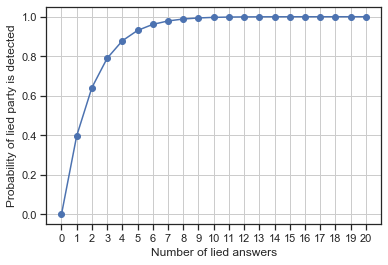

[0.0, 0.39731231978089987, 0.6415140775914581, 0.7897022361334058, 0.8784233454094307, 0.9307912412260697, 0.9612404689154856, 0.9786656718415209, 0.9884707849539315, 0.9938901007333781, 0.996828788061066, 0.9983902437074802, 0.9992020773370239, 0.9996144546614667, 0.9998187545416366, 0.9999172819387447, 0.9999634384155993, 0.9999843916536398, 0.9999935841560847, 0.9999974696181249, 0.9999990463256836]


In [14]:
p2s = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
num_query = 10
num_test = 10

total_round = num_query + num_test
num_lies_s= []

for p2 in p2s:
    temp_num_lied = total_round*p2
    num_lies_s.append(temp_num_lied)

print(num_lies_s)


mc_iter_count = 21



p3 = 1
p1 = 0.5
pA1 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]

# x_stick = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
x_stick = [0, 1, 2, 3, 4, 5,6, 7,8, 9, 10, 11,12,13, 14, 15, 16, 17,18, 19,20]
for k in range(mc_iter_count):
    temp_pA = (1-p1*p3*p2s[k])**(num_query+num_test)
    pCA1[k] = 1-temp_pA
    

plt.grid()
plt.xticks(x_stick, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20'])
plt.plot(num_lies_s, pCA1, '-o')
# plt.legend(['$p_1$= ' + str(p1s[0]), '$p_1$= 0.333', '$p_1$= ' + str(p1s[2])])
plt.xlabel('Number of lied answers')
plt.ylabel('Probability of lied party is detected')
plt.savefig('Prob_lied_detected_p3_10_num_query_10_num_test_10.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)


[0.16666666666666666, 0.3333333333333333, 0.5]
[2, 5, 10]


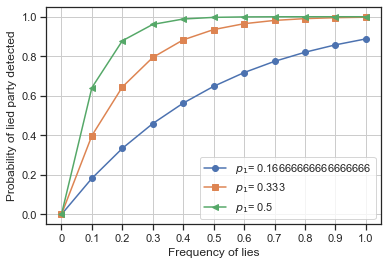

[0.0, 0.1826479897347295, 0.33423506427718397, 0.45963991233736334, 0.5630403655547607, 0.648004371985863, 0.7175704635189999, 0.7743187749495198, 0.8204335821630582, 0.857758242863828, 0.8878433452153849]
[0.0, 0.3986169993576385, 0.6447356335058557, 0.794108867905351, 0.8831089125962188, 0.9350945284811255, 0.9648156279111679, 0.9814177319941936, 0.990460592711667, 0.995252438490057, 0.9977163417394789]
[0.0, 0.6415140775914581, 0.8784233454094307, 0.9612404689154856, 0.9884707849539315, 0.996828788061066, 0.9992020773370239, 0.9998187545416366, 0.9999634384155993, 0.9999935841560847, 0.9999990463256836]


In [3]:
p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
num_query = 10
num_test_s = [int(num_query/4), (int)(num_query/2), num_query]
p1s = []
ds =[]
mc_iter_count = 11
# p1s = [0.5, 0.3, 0.1]

for num_test in num_test_s:
    temp_p1 = num_test/(num_query+num_test)  
    temp_d = num_query + num_test
    p1s.append(temp_p1)
    ds.append(temp_d)
    
print(p1s)   
print(num_test_s)

# d = num_query + num_test
p3 = 1
pA1 = mc_iter_count*[None]
pA2 = mc_iter_count*[None]
pA3 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]
pCA2 = mc_iter_count*[None]
pCA3 = mc_iter_count*[None]

x_stick = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for k in range(mc_iter_count):
    temp_pA = (1-p1s[0]*p3*p2s[k])**(ds[0])
    pCA1[k] = 1-temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1s[1]*p3*p2s[k])**(ds[1])
    pCA2[k] = 1 - temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1s[2]*p3*p2s[k])**(ds[2])
    pCA3[k] = 1 - temp_pA        
    
#ks = [k for k in range(0:0.1:1)]
# plt.title('Test success rate $p_3 = 0.8$')
plt.grid()
plt.xticks(x_stick, ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '1.0'])
plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<')
plt.legend(['$p_1$= ' + str(p1s[0]), '$p_1$= 0.333', '$p_1$= ' + str(p1s[2])])
plt.xlabel('Frequency of lies')
plt.ylabel('Probability of lied party detected')
plt.savefig('Prob_lied_detected_p3_1_num_query_10.pdf', dpi=300, bbox_inches='tight')
plt.show()
print(pCA1)
print(pCA2)
print(pCA3)

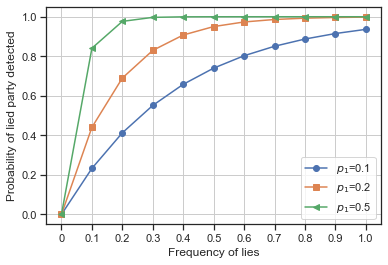

In [8]:
p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

mc_iter_count = 11
p1s = [0.1, 0.2, 0.5]
d = 30
p3 = 0.8
pA1 = mc_iter_count*[None]
pA2 = mc_iter_count*[None]
pA3 = mc_iter_count*[None]

pCA1 = mc_iter_count*[None]
pCA2 = mc_iter_count*[None]
pCA3 = mc_iter_count*[None]

x_stick = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for k in range(mc_iter_count):
    temp_pA = (1-p1s[0]*p3*p2s[k])**(d+d*p1s[0])
    pCA1[k] = 1-temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1s[1]*p3*p2s[k])**(d+d*p1s[1])
    pCA2[k] = 1 - temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1s[2]*p3*p2s[k])**(d+d*p1s[2])
    pCA3[k] = 1 - temp_pA        
    
#ks = [k for k in range(0:0.1:1)]
# plt.title('Test success rate $p_3 = 0.8$')
plt.grid()
plt.xticks(x_stick, ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '1.0'])
plt.plot(p2s, pCA1, '-o', p2s, pCA2, '-s', p2s, pCA3, '-<')
plt.legend(['$p_1$=' + str(p1s[0]), '$p_1$=' + str(p1s[1]), '$p_1$=' + str(p1s[2])])
plt.xlabel('Frequency of lies')
plt.ylabel('Probability of lied party detected')
plt.savefig('Prob_lied_detected_p3_08_d_30.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
b = 1000000000/(143195793*0.1)
b

69.83445386555455

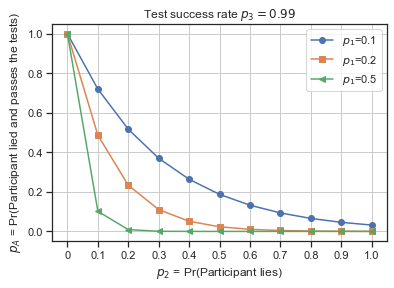

In [6]:
p2s = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
mc_iter_count = 11
p1s = [0.1, 0.2, 0.5]
d = 30
p3 = 0.99
pA1 = mc_iter_count*[None]
pA2 = mc_iter_count*[None]
pA3 = mc_iter_count*[None]

x_stick = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for k in range(mc_iter_count):
    temp_pA = (1-p1s[0]*p3*p2s[k])**(d+d*p1s[0])
    pA1[k] = temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1s[1]*p3*p2s[k])**(d+d*p1s[1])
    pA2[k] = temp_pA
    
for k in range(mc_iter_count):
    temp_pA = (1-p1s[2]*p3*p2s[k])**(d+d*p1s[2])
    pA3[k] = temp_pA        
    
#ks = [k for k in range(0:0.1:1)]
plt.title('Test success rate $p_3 = 0.99$')
plt.grid()
plt.xticks(x_stick, ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9', '1.0'])
plt.plot(p2s, pA1, '-o', p2s, pA2, '-s', p2s, pA3, '-<')
plt.legend(['$p_1$=' + str(p1s[0]), '$p_1$=' + str(p1s[1]), '$p_1$=' + str(p1s[2])])
plt.xlabel('$p_2$ = Pr(Participant lies)')
plt.ylabel('$p_A$ = Pr(Participant lied and passes the tests)')
plt.savefig('P(A_lies_at_random_and_passes_p3_099_d_30)', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
pA1

[1.0,
 0.7201268383075918,
 0.5168744203164388,
 0.3697422124119785,
 0.263585184355954,
 0.18724921239337528,
 0.13254524600690468,
 0.0934803993685297,
 0.06568334332061071,
 0.045976210071324596,
 0.03205664754777137]